<a href="https://colab.research.google.com/github/ucaokylong/Tabular_data/blob/main/Time_Series_Classification_Conv1D_fillNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# fillna(0)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1SBR55ZwlblX7diGvBzPlI-9BAY-92WyX

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SBR55ZwlblX7diGvBzPlI-9BAY-92WyX
To: /content/train_nan.csv
100% 39.4M/39.4M [00:00<00:00, 84.7MB/s]


In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_nan.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,NaN,NaN,0.362068,0.092083,-0.081268,-0.212573,NaN,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,NaN,0.373474,0.038343,NaN,-0.740860,NaN,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,NaN,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,NaN,-0.499124,-1.068629,-1.578351,-1.990534,NaN,-2.503403,-2.585211,...,0.394463,0.463685,NaN,0.517174,NaN,0.476270,0.438513,0.394463,NaN,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,NaN,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,NaN,...,0.776188,0.725496,NaN,0.731967,0.808545,0.839823,NaN,0.437520,NaN,-0.602213


In [ ]:
df = df.fillna(0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,0.000000,0.000000,0.362068,0.092083,-0.081268,-0.212573,0.000000,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,0.000000,0.373474,0.038343,0.000000,-0.740860,0.000000,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,0.000000,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,0.000000,-0.499124,-1.068629,-1.578351,-1.990534,0.000000,-2.503403,-2.585211,...,0.394463,0.463685,0.000000,0.517174,0.000000,0.476270,0.438513,0.394463,0.000000,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,0.000000,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,0.000000,...,0.776188,0.725496,0.000000,0.731967,0.808545,0.839823,0.000000,0.437520,0.000000,-0.602213


In [ ]:
df = df.to_numpy()
y_train = df[:, 0]
x_train = df[:, 1:]
y_train = y_train.astype(int)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/test_nan.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.140402,0.171641,0.302044,NaN,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,...,NaN,NaN,0.974831,1.258717,1.143316,0.647092,NaN,-0.690402,-0.976596,NaN
1,-1.0,0.334038,NaN,NaN,0.671852,0.887897,NaN,1.059750,1.030290,NaN,...,0.435186,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659
2,-1.0,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,...,3.171020,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612
3,1.0,1.240282,NaN,1.386596,NaN,1.305979,1.142784,0.878613,NaN,0.140025,...,-0.820262,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,NaN,-0.931222,-0.934498,-1.001288
4,-1.0,-1.159478,-1.204174,-1.167605,NaN,-0.818166,-0.558119,NaN,-0.093691,NaN,...,0.660853,0.441438,0.206176,NaN,NaN,-0.183082,-0.112382,NaN,0.131413,0.186266


In [ ]:
df = df.fillna(0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.140402,0.171641,0.302044,0.000000,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,...,0.000000,0.000000,0.974831,1.258717,1.143316,0.647092,0.000000,-0.690402,-0.976596,0.000000
1,-1.0,0.334038,0.000000,0.000000,0.671852,0.887897,0.000000,1.059750,1.030290,0.000000,...,0.435186,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659
2,-1.0,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,...,3.171020,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612
3,1.0,1.240282,0.000000,1.386596,0.000000,1.305979,1.142784,0.878613,0.000000,0.140025,...,-0.820262,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,0.000000,-0.931222,-0.934498,-1.001288
4,-1.0,-1.159478,-1.204174,-1.167605,0.000000,-0.818166,-0.558119,0.000000,-0.093691,0.000000,...,0.660853,0.441438,0.206176,0.000000,0.000000,-0.183082,-0.112382,0.000000,0.131413,0.186266


In [ ]:
df = df.to_numpy()
y_test = df[:, 0]
x_test = df[:, 1:]
y_test = y_test.astype(int)

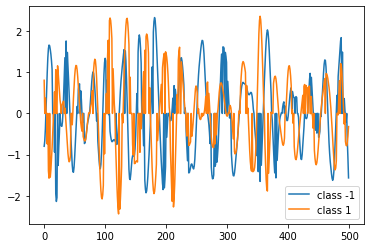

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## Build a model

In [ ]:
input_layer = keras.layers.Input((500, 1))

conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.ReLU()(conv1)

conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.ReLU()(conv2)

conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.ReLU()(conv3)

gap = keras.layers.GlobalAveragePooling1D()(conv3)
output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 500, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 500, 64)          256       
 hNormalization)                                             

## Train the model

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/500
113/113 [==============================] - 13s 11ms/step - loss: 0.6501 - sparse_categorical_accuracy: 0.5940 - val_loss: 0.8819 - val_sparse_categorical_accuracy: 0.4841 - lr: 0.0010
Epoch 2/500
113/113 [==============================] - 1s 8ms/step - loss: 0.5838 - sparse_categorical_accuracy: 0.6784 - val_loss: 1.0693 - val_sparse_categorical_accuracy: 0.4841 - lr: 0.0010
Epoch 3/500
113/113 [==============================] - 1s 12ms/step - loss: 0.5271 - sparse_categorical_accuracy: 0.7248 - val_loss: 0.7184 - val_sparse_categorical_accuracy: 0.4894 - lr: 0.0010
Epoch 4/500
113/113 [==============================] - 1s 10ms/step - loss: 0.4963 - sparse_categorical_accuracy: 0.7526 - val_loss: 0.7454 - val_sparse_categorical_accuracy: 0.5333 - lr: 0.0010
Epoch 5/500
113/113 [==============================] - 1s 10ms/step - loss: 0.4768 - sparse_categorical_accuracy: 0.7548 - val_loss: 2.1959 - val_sparse_categorical_accuracy: 0.5159 - lr: 0.0010
Epoch 6/500
113/113 [====

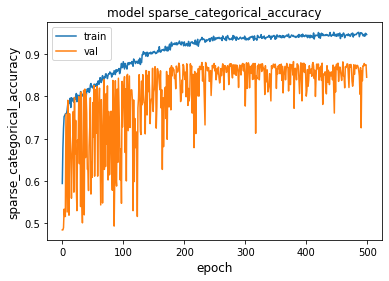

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()